# 電力消費データのハンドリング用
データ整形して、ハンドリングしやすいPandasのDataFrame形式にして、
CSVで保存

In [ ]:
# Google Driveにマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import glob
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#f_namelist1に電力ファイル名が入る
base_drive_path='/content/drive/MyDrive/誘雷ドローン/１２月実験/200m吊るし'
# 電力消費データ log Filename を集める
os.chdir(base_drive_path)
d_path = '*.log'
f_namelist1 = glob.glob(d_path)

# 全ファイルを変換してCSV化
読み込む時は、pd.read_csv('ファイル名')でDataFrame化する

In [ ]:
def time_convert(x):
    h,m,s = map(int,x.split(':'))
    return (h*60+m)*60+s

for i,power_log_file in enumerate(f_namelist1):
  power_log = pd.read_csv(filepath_or_buffer="{}/{}".format(base_drive_path, power_log_file), encoding="utf-8", sep=",", skipinitialspace = True)
  # 消費電力のログの使わないラベル削除してラベルリネーム
  # Volts,Amps ,RPM  ,MaOut,MaIn ,Alt  ,hh:mm:ss,TempA,Temp1,Temp2,Temp3,Throt,Ef,Thrus,Exp
  power_log=power_log[['Volts', 'Amps ','MaOut','Alt  ', 'hh:mm:ss','TempA']]
  power_log=power_log.rename(columns={'Volts':'Volt'})
  power_log=power_log.rename(columns={'Amps ':'Amp'})
  power_log=power_log.rename(columns={'Alt  ':'Alt'})
  power_log=power_log.rename(columns={'hh:mm:ss':'Time'})
  power_log=power_log.rename(columns={'TempA':'Temp'})
  # 電力の計算
  power_log["Pow"]=power_log["Volt"]*power_log["Amp"]
  # 時刻のタイムスタンプを秒に変更
  power_log["Second"] = power_log.Time.apply(time_convert)
  out_file_name=power_log_file+".csv"
  power_log.to_csv(out_file_name, index=False)


# １ファイルづつの操作の場合

In [ ]:
power_log_file = "20211208_1207.log"
power_log = pd.read_csv(filepath_or_buffer="{}/{}".format(base_drive_path, power_log_file), encoding="utf-8", sep=",", skipinitialspace = True)
#power_log.plot(figsize=(20, 4))

# 消費電力のログの使わないラベル削除してラベルリネーム
# Volts,Amps ,RPM  ,MaOut,MaIn ,Alt  ,hh:mm:ss,TempA,Temp1,Temp2,Temp3,Throt,Ef,Thrus,Exp
power_log=power_log[['Volts', 'Amps ','MaOut','Alt  ', 'hh:mm:ss','TempA']]
power_log=power_log.rename(columns={'Volts':'Volt'})
power_log=power_log.rename(columns={'Amps ':'Amp'})
power_log=power_log.rename(columns={'Alt  ':'Alt'})
power_log=power_log.rename(columns={'hh:mm:ss':'Time'})
power_log=power_log.rename(columns={'TempA':'Temp'})
# 電力の計算
power_log["Pow"]=power_log["Volt"]*power_log["Amp"]
# 時刻のタイムスタンプを秒に変更
def time_convert(x):
    h,m,s = map(int,x.split(':'))
    return (h*60+m)*60+s

power_log["Second"] = power_log.Time.apply(time_convert)
#power_log.head()
out_file_name=power_log_file+".csv"
power_log.to_csv(out_file_name, index=False)

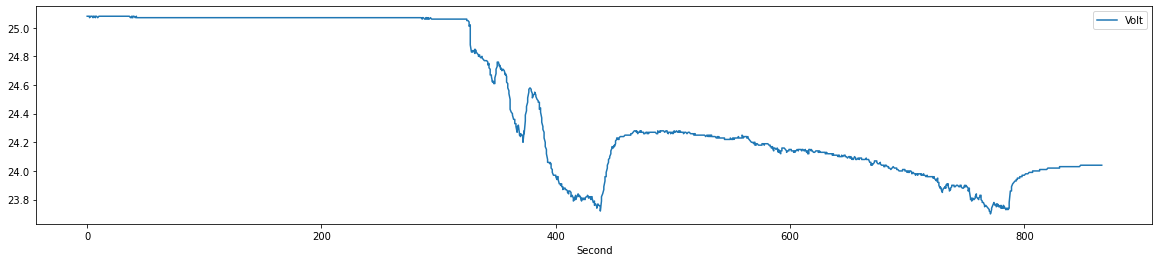

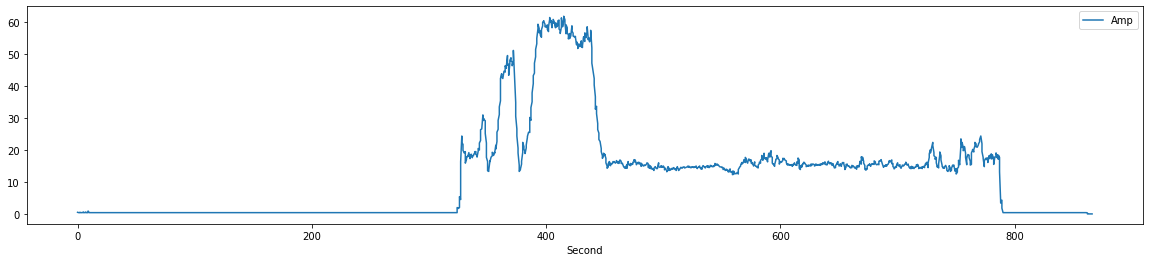

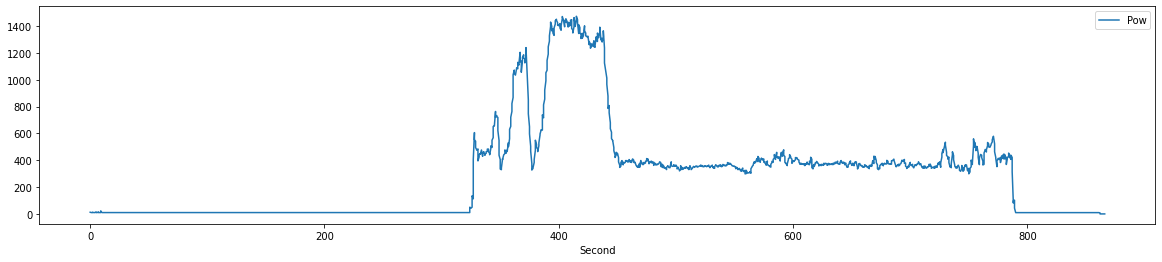

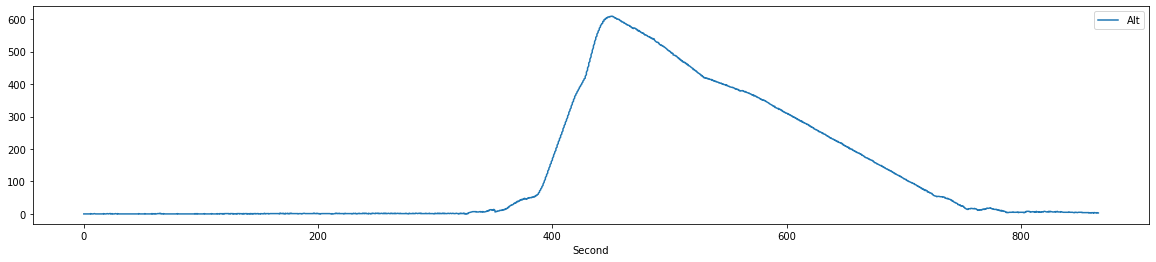

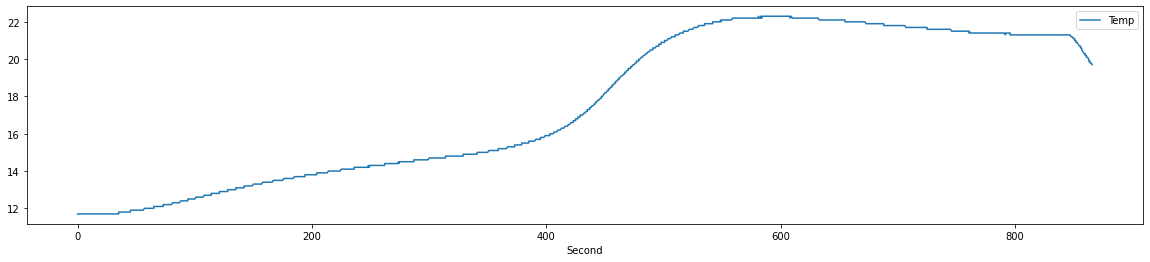

In [ ]:
power_log.plot(x="Second",y="Volt",figsize=(20, 4))
power_log.plot(x="Second",y="Amp",figsize=(20, 4))
power_log.plot(x="Second",y="Pow",figsize=(20, 4))
power_log.plot(x="Second",y="Alt",figsize=(20, 4))
power_log.plot(x="Second",y="Temp",figsize=(20, 4))

In [ ]:
power_log["Pow"]=power_log["Volt"]*power_log["Amp"]

In [ ]:
power_log[["Second","Pow","Volt","Amp"]]

,Second,Pow,Volt,Amp
0,0,12.540,25.08,0.5
1,1,10.032,25.08,0.4
2,1,10.032,25.08,0.4
3,2,10.032,25.08,0.4
4,2,12.535,25.07,0.5
...,...,...,...,...
1728,864,0.000,24.04,0.0
1729,865,0.000,24.04,0.0
1730,865,0.000,24.04,0.0
1731,866,0.000,24.04,0.0


# CSVファイルからPandas DataFrameに入れる

In [ ]:
#f_namelist1に電力ファイル名が入る
base_drive_path='/content/drive/MyDrive/誘雷ドローン/１２月実験/200m吊るし'
# 電力消費データ log Filename を集める
os.chdir(base_drive_path)
d_path = '*.log.csv'
f_namelist1 = glob.glob(d_path)

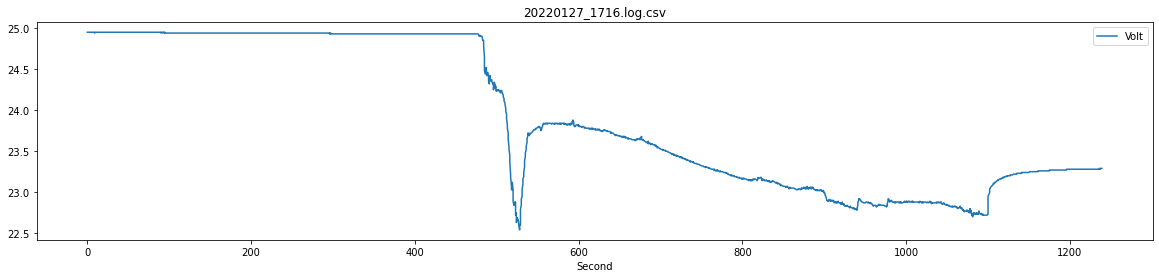

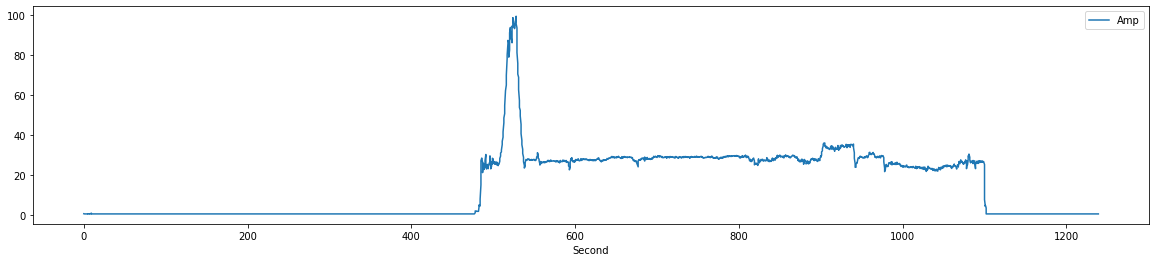

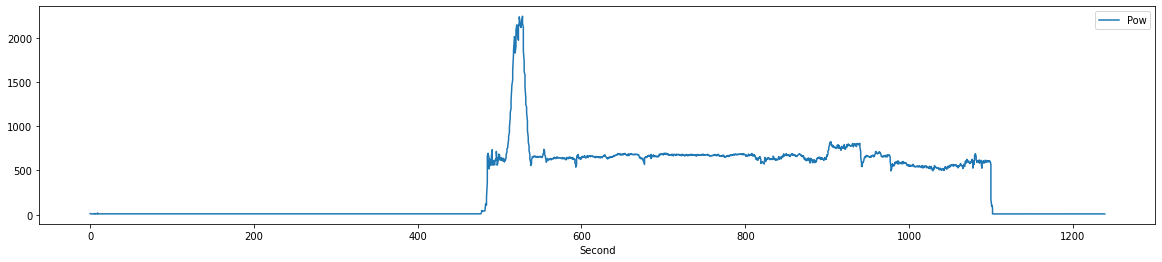

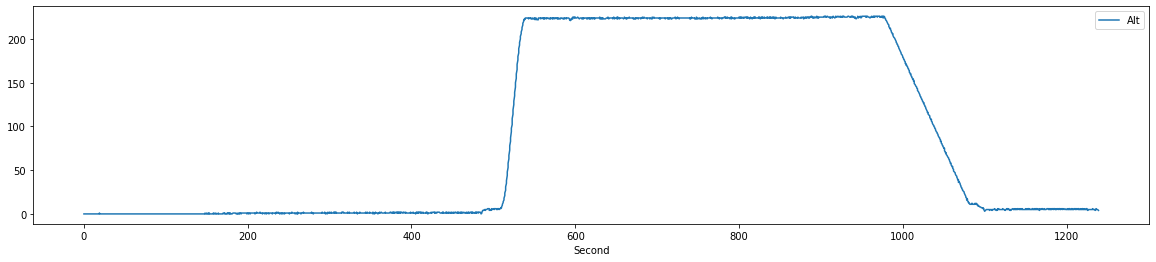

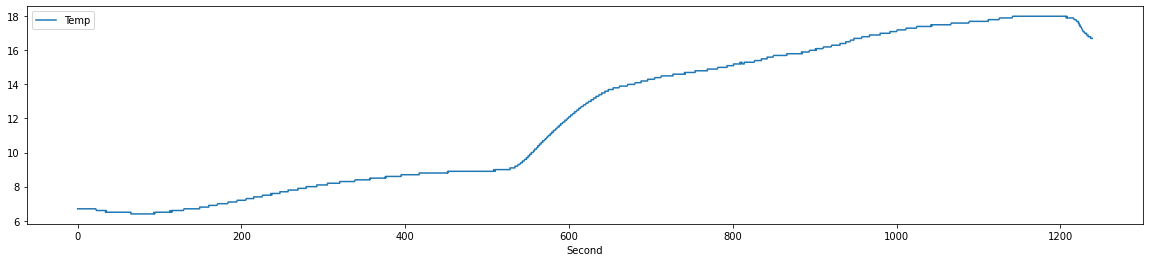

In [ ]:
i=0
power_log=pd.read_csv(f_namelist1[i])
power_log.plot(x="Second",y="Volt",figsize=(20, 4),title=f_namelist1[i])
power_log.plot(x="Second",y="Amp",figsize=(20, 4))
power_log.plot(x="Second",y="Pow",figsize=(20, 4))
power_log.plot(x="Second",y="Alt",figsize=(20, 4))
power_log.plot(x="Second",y="Temp",figsize=(20, 4))

# 2回計測しているものを分割したりするために時間で区切ってみる

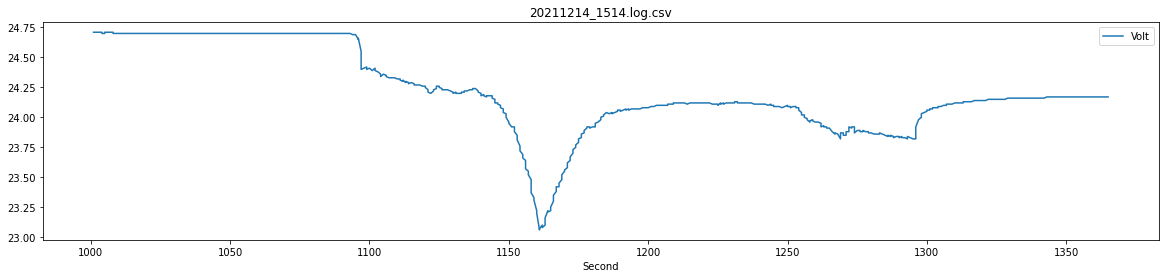

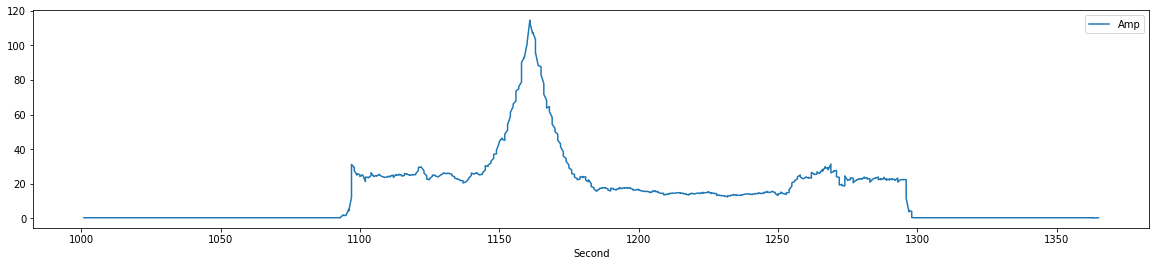

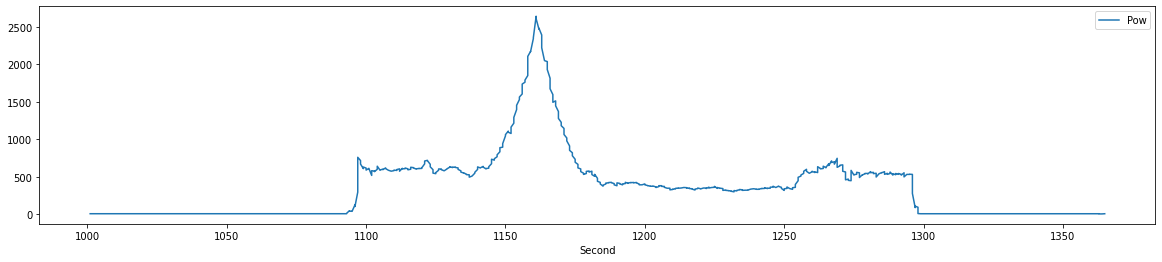

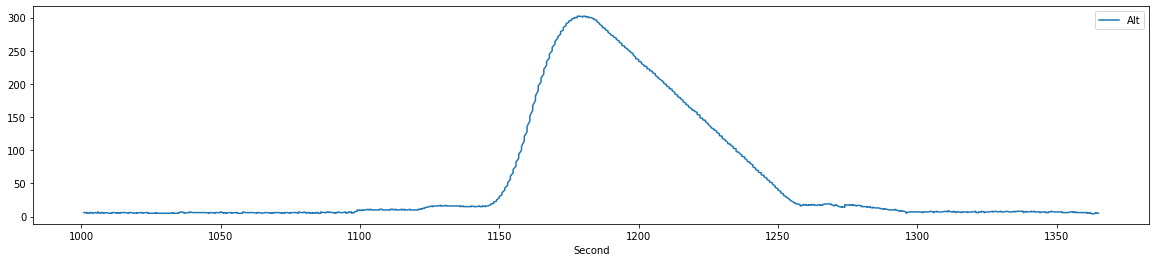

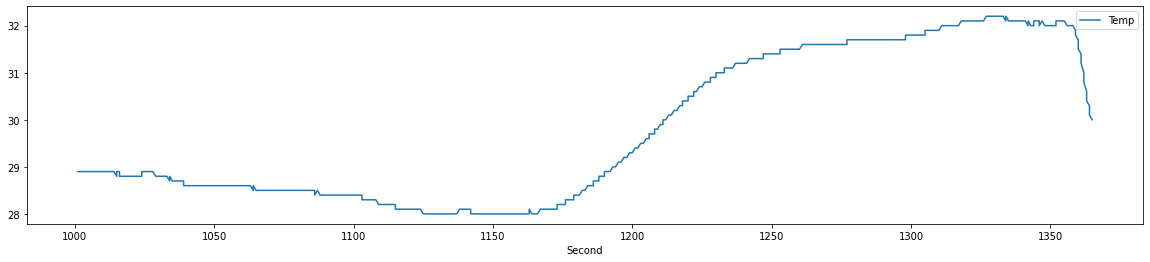

In [ ]:
i=15
power_log=pd.read_csv(f_namelist1[i])
power_log[power_log["Second"] > 1000 ].plot(x="Second",y="Volt",figsize=(20, 4),title=f_namelist1[i])
power_log[power_log["Second"] > 1000 ].plot(x="Second",y="Amp",figsize=(20, 4))
power_log[power_log["Second"] > 1000 ].plot(x="Second",y="Pow",figsize=(20, 4))
power_log[power_log["Second"] > 1000 ].plot(x="Second",y="Alt",figsize=(20, 4))
power_log[power_log["Second"] > 1000 ].plot(x="Second",y="Temp",figsize=(20, 4))

In [ ]:
# データを分割して保存
out_file_name=f_namelist1[i]+".1.csv"
power_log[power_log["Second"] < 1100 ].to_csv(out_file_name, index=False)
out_file_name=f_namelist1[i]+".2.csv"
power_log[power_log["Second"] > 1100 ].to_csv(out_file_name, index=False)